In [19]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows  
from rasterio import features  
from rasterio import warp
from rasterio.warp import transform_bounds 
from rasterio.windows import from_bounds 

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import VotingRegressor
# from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Hyperparameter Tuning
import optuna

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm

In [20]:
csv_path = 'Training_data_uhi_index.csv'
df = pd.read_csv(csv_path)

In [21]:
landsat = 'Landsat_LST.tiff'

with rasterio.open(landsat) as src:
    data1 = src.read(1)


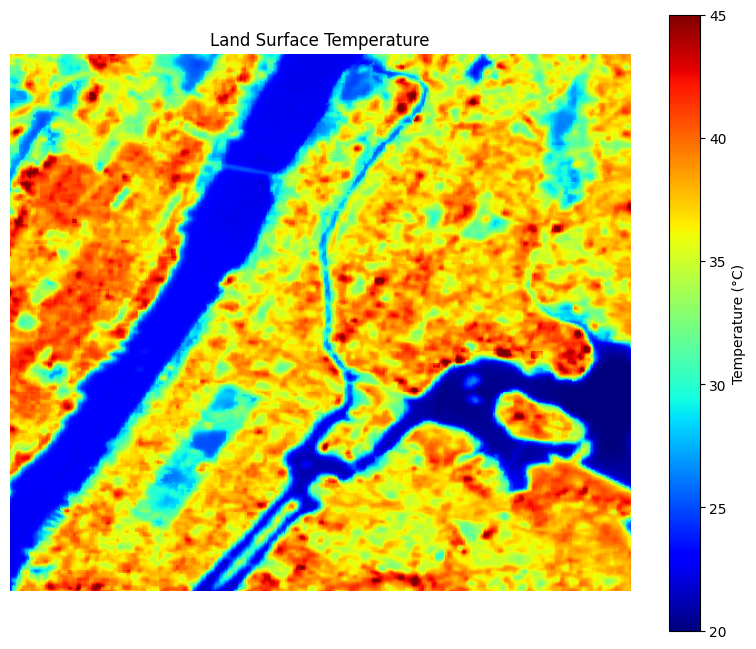

In [22]:
plt.figure(figsize=(10, 8))
plt.imshow(data1, cmap="jet", vmin=20.0, vmax=45.0)
plt.colorbar(label="Temperature (°C)")
plt.title("Land Surface Temperature")
plt.axis("off")
plt.show()

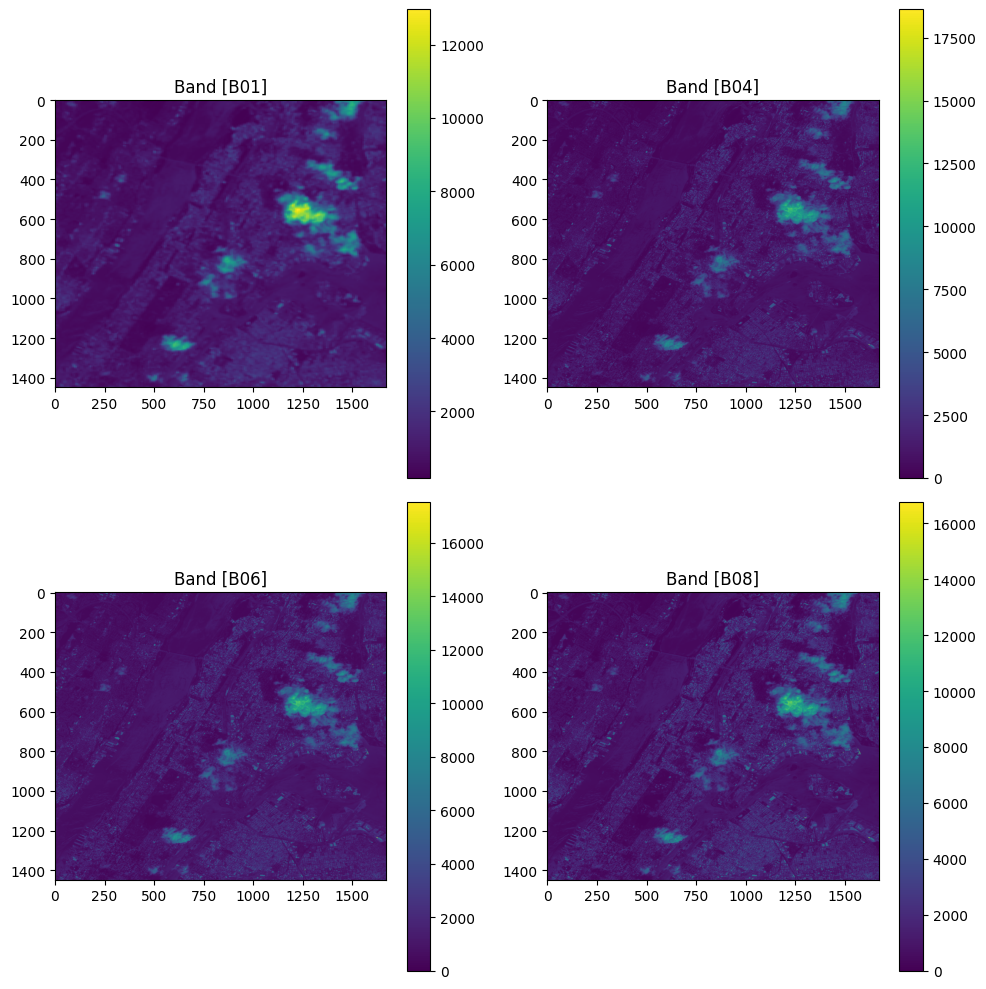

In [23]:
sentinel2 = 'S2_sample.tiff'

with rasterio.open(sentinel2) as src1:
    band1 = src1.read(1)  
    band2 = src1.read(2)  
    band3 = src1.read(3)  
    band4 = src1.read(4) 
    band5 = src1.read(5)  
    band6 = src1.read(6)  
    band7 = src1.read(7)  
    band8 = src1.read(8)
    band9 = src1.read(9)  
    band10 = src1.read(10)  
    band11 = src1.read(11) 

# Plot the bands in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot the first band (B01)
im1 = axes[0].imshow(band1, cmap='viridis')
axes[0].set_title('Band [B01]')
fig.colorbar(im1, ax=axes[0])

# Plot the second band (B04)
im2 = axes[1].imshow(band2, cmap='viridis')
axes[1].set_title('Band [B04]')
fig.colorbar(im2, ax=axes[1])

# Plot the third band (B06)
im3 = axes[2].imshow(band3, cmap='viridis')                 
axes[2].set_title('Band [B06]')
fig.colorbar(im3, ax=axes[2])

# Plot the fourth band (B08)
im4 = axes[3].imshow(band4, cmap='viridis')
axes[3].set_title('Band [B08]')
fig.colorbar(im4, ax=axes[3])

plt.tight_layout()
plt.show()

In [24]:
# Extracts satellite band values from a GeoTIFF based on coordinates from a csv file and returns them in a DataFrame.

def map_satellite_data(tiff_path, csv_path):
    
    # Load the GeoTIFF data
    data = rxr.open_rasterio(tiff_path)
    tiff_crs = data.rio.crs

    # Read the Excel file using pandas
    df = pd.read_csv(csv_path)
    latitudes = df['Latitude'].values
    longitudes = df['Longitude'].values

    # 3. Convert lat/long to the GeoTIFF's CRS
    # Create a Proj object for EPSG:4326 (WGS84 - lat/long) and the GeoTIFF's CRS
    proj_wgs84 = Proj('epsg:4326')  # EPSG:4326 is the common lat/long CRS
    proj_tiff = Proj(tiff_crs)
    
    # Create a transformer object
    transformer = Transformer.from_crs("epsg:4326", tiff_crs, always_xy=True)

    B01_values = []
    B02_values = []
    B03_values = []
    B04_values = []
    B05_values = []
    B06_values = []
    B07_values = []
    B08_values = []
    B8A_values = []
    B11_values = []
    B12_values = []

# Iterate over the latitudes and longitudes, and extract the corresponding band values
    for lat, lon in tqdm(zip(latitudes, longitudes), total=len(latitudes), desc="Mapping Sentinel2 data to csv"):
        # Transform the coordinates from EPSG:4326 to the GeoTIFF's CRS (x, y order)
        x, y = transformer.transform(lon, lat)

        # For each band, select the nearest pixel value at (x, y)
        B01_value = data.sel(x=x, y=y, band=1, method="nearest").values.item()
        B01_values.append(B01_value)
    
        B02_value = data.sel(x=x, y=y, band=2, method="nearest").values.item()
        B02_values.append(B02_value)
        
        B03_value = data.sel(x=x, y=y, band=3, method="nearest").values.item()
        B03_values.append(B03_value)
    
        B04_value = data.sel(x=x, y=y, band=4, method="nearest").values.item()
        B04_values.append(B04_value)
        
        B05_value = data.sel(x=x, y=y, band=5, method="nearest").values.item()
        B05_values.append(B05_value)
    
        B06_value = data.sel(x=x, y=y, band=6, method="nearest").values.item()
        B06_values.append(B06_value)
        
        B07_value = data.sel(x=x, y=y, band=7, method="nearest").values.item()
        B07_values.append(B07_value)
    
        B08_value = data.sel(x=x, y=y, band=8, method="nearest").values.item()
        B08_values.append(B08_value)
    
        B8A_value = data.sel(x=x, y=y, band=9, method="nearest").values.item()
        B8A_values.append(B8A_value)
    
        B11_value = data.sel(x=x, y=y, band=10, method="nearest").values.item()
        B11_values.append(B11_value)
        
        B12_value = data.sel(x=x, y=y, band=11, method="nearest").values.item()
        B12_values.append(B12_value)

    # Create a DataFrame with the band values
    # Create a DataFrame to store the band values
    df = pd.DataFrame()
    df['B01'] = B01_values
    df['B02'] = B02_values
    df['B03'] = B03_values
    df['B04'] = B04_values
    df['B05'] = B05_values
    df['B06'] = B06_values
    df['B07'] = B07_values
    df['B08'] = B08_values
    df['B8A'] = B8A_values
    df['B11'] = B11_values
    df['B12'] = B12_values
    
    return df

def map_lst_data(tiff_path, csv_path):

    data = rxr.open_rasterio(tiff_path)
    tiff_crs = data.rio.crs

    df = pd.read_csv(csv_path)
    latitudes = df['Latitude'].values
    longitudes = df['Longitude'].values

    proj_wgs84 = Proj('epsg:4326')  
    proj_tiff = Proj(tiff_crs)

    transformer = Transformer.from_proj(proj_wgs84, proj_tiff)

    data_val = []

    for lat, lon in tqdm(zip(latitudes, longitudes), total=len(latitudes), desc='Mapping Landsat_LST data to csv'):
        # Transform (lon, lat) from WGS84 to TIFF's CRS coordinates (x, y)
        x, y = transformer.transform(lon, lat)
        
        # Select the nearest pixel value from the TIFF.
        # Adjust the 'band' keyword if needed (here we assume band index 1).
        lst_val = data.sel(x=x, y=y, band=1, method="nearest").values.item()
        data_val.append(lst_val)

    df = pd.DataFrame()
    df['LST'] = data_val

    return df

# Mapping satellite data with training data.
s2_train = map_satellite_data('S2_sample.tiff', 'Training_data_uhi_index.csv')
lst_train = map_lst_data('Landsat_LST.tiff', 'Training_data_uhi_index.csv')

final_data = pd.concat([s2_train, lst_train[['LST']]], axis=1)

Mapping Landsat_LST data to csv: 100%|██████████| 11229/11229 [00:07<00:00, 1416.86it/s]


In [25]:
final_data

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,LST
0,846.0,1042.0,1036.0,1036.0,1272.0,1502.0,1605.0,1906.0,1638.0,1487.0,1265.0,38.393941
1,846.0,1042.0,1036.0,1036.0,1272.0,1502.0,1605.0,1906.0,1638.0,1487.0,1265.0,38.393941
2,846.0,583.0,818.0,709.0,1054.0,1668.0,2097.0,2190.0,2149.0,1465.0,991.0,37.785534
3,846.0,581.0,733.0,657.0,1054.0,1668.0,2097.0,2182.0,2149.0,1465.0,991.0,37.785534
4,846.0,655.0,744.0,745.0,1021.0,1728.0,1943.0,2112.0,2056.0,1544.0,1134.0,37.358281
...,...,...,...,...,...,...,...,...,...,...,...,...
11224,481.0,473.0,708.0,528.0,990.0,2382.0,2494.0,3284.0,3055.0,1827.0,1079.0,30.293234
11225,481.0,540.0,742.0,610.0,990.0,2382.0,2494.0,2900.0,3055.0,1827.0,1079.0,30.293234
11226,481.0,540.0,742.0,610.0,990.0,2382.0,2494.0,2900.0,3055.0,1827.0,1079.0,30.440209
11227,481.0,540.0,742.0,610.0,990.0,2382.0,2494.0,2900.0,3055.0,1827.0,1079.0,30.440209


In [26]:
final_data.to_csv('final_data.csv', index=False)

In [27]:
import rasterio
with rasterio.open("Landsat_LST.tiff") as src:
    print("Resolution:", src.res)  # Pixel size in coordinate units (e.g., degrees or meters)
    print("Bounds:", src.bounds)


Resolution: (0.00026881720430108546, 0.0002685950413223193)
Bounds: BoundingBox(left=-74.01, bottom=40.75, right=-73.86, top=40.88)


In [28]:
data = rxr.open_rasterio('Landsat_LST.tiff')
tiff_crs = data.rio.crs

df = pd.read_csv(csv_path)
latitudes = df['Latitude'].values
longitudes = df['Longitude'].values

proj_wgs84 = Proj('epsg:4326')  
proj_tiff = Proj(tiff_crs)

transformer = Transformer.from_proj(proj_wgs84, proj_tiff)
for lat, lon in zip(latitudes[:5], longitudes[:5]):
    x, y = transformer.transform(lon, lat)
    print(f"Original: ({lon}, {lat}) -> Transformed: ({x}, {y})")

Original: (-73.90916667, 40.81310667) -> Transformed: (-73.90916667, 40.81310667)
Original: (-73.90918667, 40.813045) -> Transformed: (-73.90918667, 40.813045)
Original: (-73.909215, 40.81297833) -> Transformed: (-73.909215, 40.81297833)
Original: (-73.90924167, 40.81290833) -> Transformed: (-73.90924167, 40.81290833)
Original: (-73.90925667, 40.812845) -> Transformed: (-73.90925667, 40.812845)
